82.7
12.8
21.683333333333334


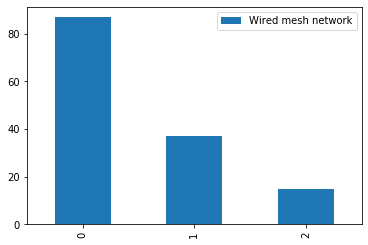

In [9]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_change(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        last_gw = ""
        cnt = 0
        for index, row in gw_data.iterrows():
            if last_gw != row['gateway']:
                last_gw = row['gateway']
                cnt+=1
        sum_change +=cnt
    return sum_change/len(dirs)

print(read_gateway_change("wired/best/gwChange"))
print(read_gateway_change("wired/power2/gwChange"))
print(read_gateway_change("wired/random/gwChange"))

df = pd.DataFrame({'Wired mesh network':[read_gateway_change("wireless/50nodes/best/gwChange"), 
                               read_gateway_change("wireless/20nodes/gwChange"), 
                                   read_gateway_change("wireless/50nodes/random/gwChange")]})
df.plot.bar(legend=["Best gateway selection", 'Our proposal', 'Random gateway selection'])

plt.show()

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


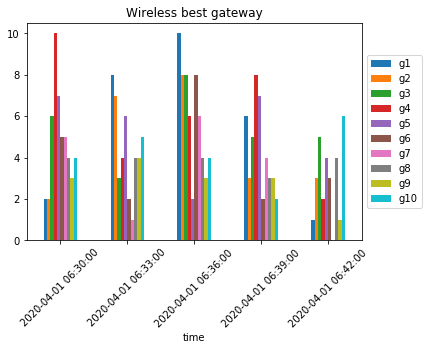

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


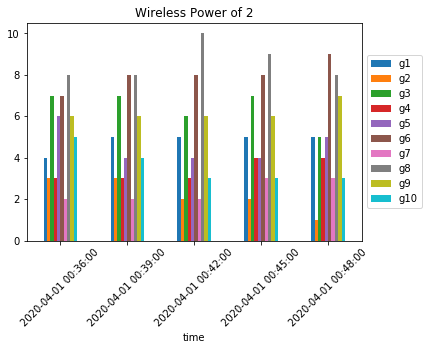

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


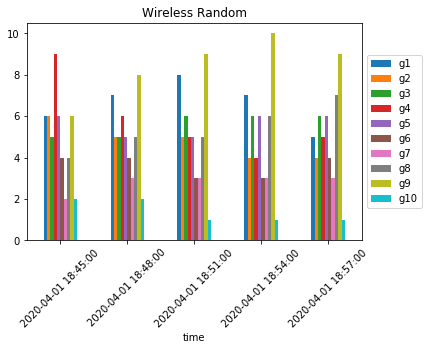

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


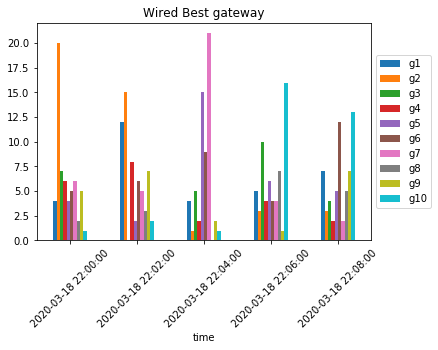

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


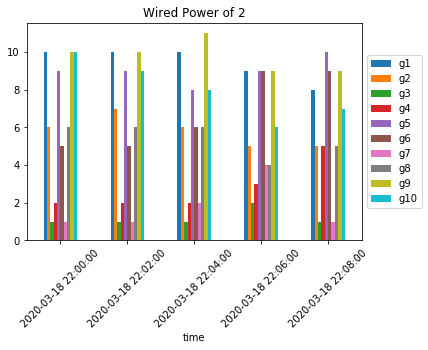

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


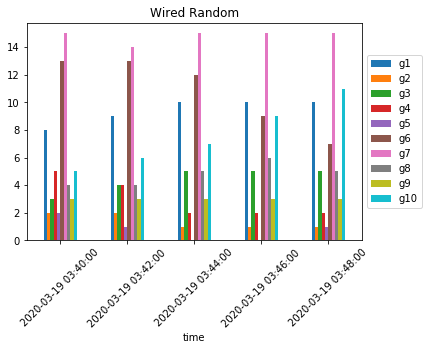

In [14]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name, title, fr):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(50)
        data = data.append(gw_data)
    
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    data.groupby([pd.TimeGrouper(freq=fr), data['gateway']]).count().unstack().iloc[20:25].plot.bar(rot=45)
    #for name, group in data.groupby([pd.TimeGrouper(freq='2min'), data['gateway']]):
    #    groupDf = groupDf.append({"time":name[0],"gateway":name[1], "users":len(group)}, ignore_index=True)
    
    #groupDf = groupDf.set_index(pd.DatetimeIndex(groupDf['time']))
    #groupDf = groupDf.sort_index()
    #print(groupDf.head(10))
    #groupDf[['gateway','users']].head(10).plot.bar(rot=45, y = ['user'], x='gateway')
    plt.legend(['g1','g2','g3','g4','g5','g6','g7','g8','g9','g10'],loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.show()
    #for every gateway, find the avg load
    #for name, group in (groupDf.groupby(['gateway'])):
    #    print(name, group['users'])
        
read_gateway_users("wireless/50nodes/best/gwChange", 'Wireless best gateway', '3Min')
read_gateway_users("wireless/50nodes/power2/gwChange", 'Wireless Power of 2', '3Min')
read_gateway_users("wireless/50nodes/random/gwChange", 'Wireless Random', '3Min')

read_gateway_users("wired/best/gwChange", 'Wired Best gateway', '2Min')
read_gateway_users("wired/power2/gwChange", 'Wired Power of 2', '2Min')
read_gateway_users("wired/random/gwChange", 'Wired Random', '2Min')

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


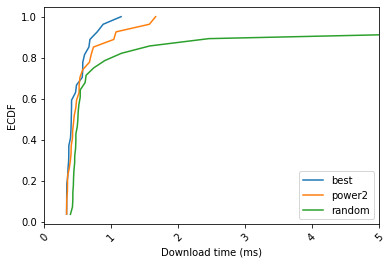

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


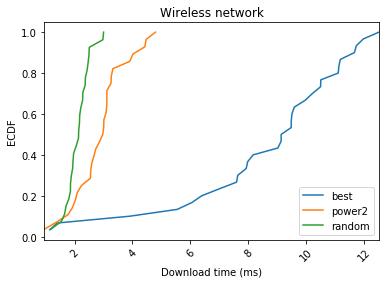

In [15]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'latency']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(50)
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='2min')]).mean()
    plt.show()

def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.latency.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

fig, ax = plt.subplots()
getECDF(read_gateway_users("wired/best/download")).plot(ax = ax, rot=45)
getECDF(read_gateway_users("wired/power2/download")).plot(ax=ax, rot=45)
getECDF(read_gateway_users("wired/random/download")).plot(ax=ax, rot=45)
plt.legend(['best','power2','random'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.xlim(0,5)
plt.show()

fig, ax = plt.subplots()
getECDF(read_gateway_users("wireless/50nodes/best/download")).plot(ax = ax, rot=45)
getECDF(read_gateway_users("wireless/50nodes/power2/download")).plot(ax=ax, rot=45)
getECDF(read_gateway_users("wireless/50nodes/random/download")).plot(ax=ax, rot=45)
plt.legend(['best','power2','random'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.title('Wireless network')
plt.show()